# Властелин колец: Карта Всевластия 

```
Когда Фродо сообщил, что в гости к нему обещает приехать Гендальф, весь Хоббитон заволновался.

Минуло уже 30 лет с тех пор, как Фродо сжег кольцо в жерле Ородруина и в Средиземье царил мир.
Хорошее состояние дел можно было оценить по животикам хоббитов, которые только росли с каждым годом от невероятного количества печенья, которое могли теперь себе позволить хоббиты.

Фродо решил к приезду Гендальфа почти не готовится: все же, Гендальф был старым другом, приезд которого не испортишь спонтанностью.
Именно поэтому вечер накануне Фродо решил провести в "Зеленом драконе".

Подходя к таверне Фродо уже издалека увидел небольшую толпу хоббитов, что-то выглядывающую в окнах паба. 
Зрелище это его ничуть не удивило - все знают, что хоббиты - народ любопытый, 
будут про тебя сплетничать еще лет пять, даже если сделаешь что-то хоть капельку необычное. 
Так что Фродо надеялся, что эта толпа скоро распадется, а он спокойно выпьет пинту эля без посторонних любопытных взглядов.
Зайдя в таверну, Фродо понял - его надеждам не суждено сбыться. Ведь в таверне сидел сам Гендальф.

Дальше последовало много объятий, теплых слов и кружек гоячительных напитков. 
Друзья наперебой рассказывали друг другу новости из своей недавней жизни - новостей оказалось предостаточно.

Наконец речь пошла о той небольшой прогулке, которое они совершили 30 лет назад - из Хоббитона в Мордор.
Сначала вспомнили старых знакомых - как они там поживают? Потом перешли к самим событиям приключения.

Неожиданно, разговор свернул в странную тему:

- Ты знаешь, я ведь теперь стал почти профессиональным...картографом! - после семи кружек эля Фродо говорил уже не так содержательно, как в начале. - Все эти дорожки, тропинки, запретные леса...
А еще после полета на орлах! Да мы же понятия не имели, куда там дальше идти. Но ничего, я справился!
- Да, уверен, теперь ты хоть откуда дорогу до Мордора найдешь - ехидно сказал Гендальф, усмехаясь в бороду.
- А что, а и найду! Куда бы ты меня не закинул - отовсюду выберусь! Хочешь, поспорим? Твоя трубка против моей!
- Ну а как проверять будем? Думаешь, помощь орлов потребуется? - Гендальф уже с трудом сдерживал смех, глядя на самоуверенного хоббита
- Да ну их, орлов этих! Лететь замерзнешь! - на полном серьезе возражал Фродо. 
- Вот! - Фродо ткнул в карту Средиземья, что висела на стене. - Попросим трактирщика
назвать любой захолустный городишко и посмотрим, кто быстрее скажет, как до Мордора дойти.
- Ну, давай попробуем. Новая трубка мне точно пригодится.
```

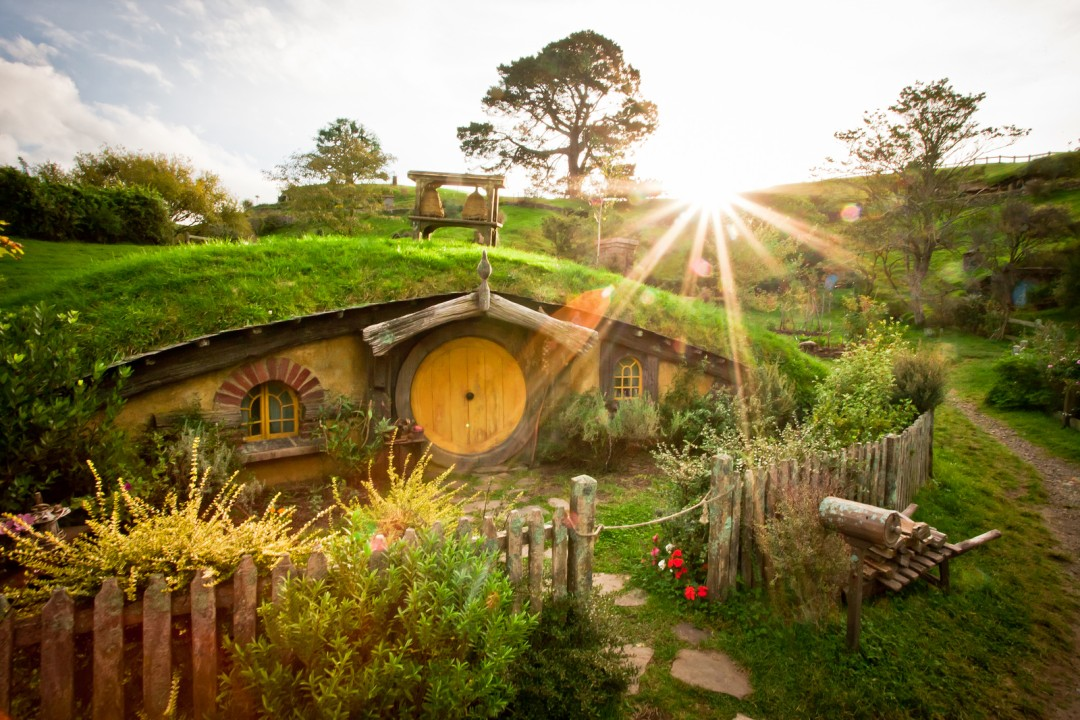

Итак, вам предстоит помочь Фродо выиграть в этом нехитром споре.
Чтобы помочь ему, будем решать похожую задачу - найти кратчайший путь в русской Википедии между любой статьей и статьей про Мордор быстрее всех.


Формальная постановка задачи:
- в Википедии можно открыть случайную статью по специальной ссылке
- Кликая на слова в статье, мы можем переходить на другие статьи Википедии
- Нам нужно дойти до статьи в Википедии про [Мордор](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D1%80%D0%B4%D0%BE%D1%80)
- На поиск будет дано определенное время
- Выигрывает тот, кто дошел до статьи про Мордор за наименьшее число шагов. Если таких людей несколько, то выигрывает тот, кто сделал это быстрее всех
- Также нужно показать, какой путь был использован (напечатать в конце переходы)


Задание будет разбито на две части:
- в первой части мы подумаем, какие нам нужны структуры данных и напишем их
- во второй будем уже применять эти структуры на статьях Википедии (будем соревноваться, кто быстрее ищет Мордор)

### Википедия - это граф

По сути, нам предстоит решить очень алгоритмическую задачу:
- у нас есть статьи
- между ними есть связи (переходы из статьи в статью)

Это можно представить в виде направленного графа. Узлы графа - статьи. Между статьей А и статьей Б есть ребро, если в тексте статьи А есть ссылка на статью Б.

*Пример*: у вас есть статья "Собака", в ней есть ссылки на статьи про волков и про людей. Тогда граф будет выглядеть так:


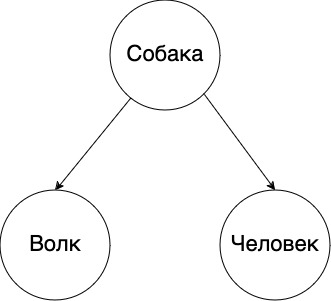

### Статьи - это узлы

Теперь давайте подумаем, как будут выглядеть узлы в нашем графе. Какую информацию нам нужно будет хранить в каждом узле?
* Точно нужно хранить название статьи, чтобы в конце показать, по каким статьям мы переходили
* Также нужна ссылка на статью, для тех же целей
* Наверное, нужно хранить информацию о соседях, то есть статьи, в которые можно перейти
* Ну и инофрмация о предыдущем узле. Это нужно для печати в конце

Давайте сразу напишем такой класс, назовем его `Node`. У него будут аттрибуты:
* `title` - название статьи
* `url` - ссылка на статью
* `neighbours` - список соседей
* `prev` - предыдущий узел, из которого мы пришли

Все эти аттрибуты должны приниматься в конструкторе (кроме neigbours - это поле, которое инициализируется пустым списком). У `prev` должно быть значение по умолчанию `None` (пригодится нам для построения начального узла графа)

In [ ]:
# TODO: здесь нужно написать класс Node

### Поиск нужной статьи

Теперь мы уже можем построить граф. Например, вот граф для статьи про собак из примера выше:

```
root = Node("Собака", "https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B1%D0%B0%D0%BA%D0%B0", [])
root.neighbours.append(Node("Волк", "https://ru.wikipedia.org/wiki/%D0%92%D0%BE%D0%BB%D0%BA", [], root)
root.neighbours.append(Node("Человек", https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA", [], root)
```

В этой лабе мы предполагаем, что мы:
- начали с какой-то статьи
- обошли все ее ссылки, построили для них узлы
- обошли все ссылки внутри этих ссылок, построили для них узлы
- и так далее, пока не закончились ссылки

Теперь нам нужно сделать поиск по графу - найти статью про Мордор, то есть найти узел, у которого в аттрибуте `title` написано `Мордор`.
Как будем искать такой узел? Есть два популярных варианта.

#### Поиск в глубину (DFS, depth-first-search)

В этом подходе мы обходим узлы следующим образом:
- если из узла выходит ребро, то мы по нему переходим
- если из узла не выходит уже ребер, то мы обрабатываем текущий узел
- после этого возвращаемся на шаг назад, то есть возвращаемся в узел, из которого мы пришли в текущий (родительский узел)
- смотрим, выходят ли из него еще какие-то ребра. если выходят, то переходим по следующему ребру, опять настолько глубоко, насколько возможно
- если же больше ребер нет (или по всем мы уже ходили), то обрабатываем текущий узел. после чего снова поднимаемся на шаг вверх

Вот гифка о том, как это работает:

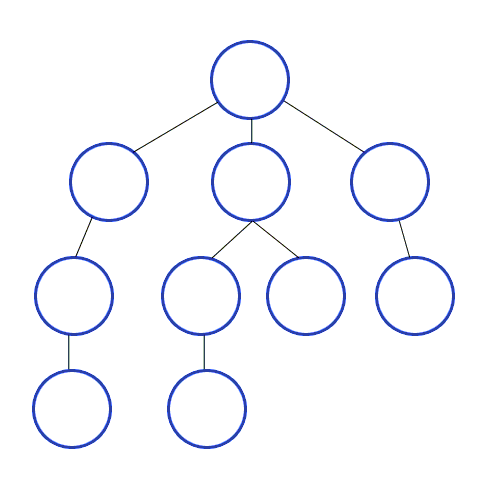

Давайте для примера напишем функцию `dfs`, которая будет в список складывать названия наших узлов в `dfs` порядке:
- функция принимает в себя два параметра: `node` - текущий узел и `result` - список, в который мы складываем названия статей
- внутри функции нам нужно для каждого соседнего узла вызвать рекурсивно нашу функцию dfs
- после того как мы обработали все узлы, кроме нашего, записываем в результирующий список название нашего узла

*Пример*:

Корневой узел - "Собака", соседи - узлы "Волк" и "Человек"
- вызываем dfs с нашим корневым узлом "Собака", в качестве списка названий передаем пустой список
- внутри функции получаем соседей узла. Это "Волк" и "Человек". Рекурсивно вызываем функцию dfs для каждого узла по очереди (начинаем с "Волк")
- узел "Волк" не имеет соседей, поэтому рекурсивно функцию для его соседей не вызываем
- записываем "Волк" в наш результирующий список, возвращаемся из функции
- снова вызываем dfs в цикле, следующий узел - "Человек". Для него логика такая же, в список добавим "Человек"
- теперь цикл закончился, мы обошли вглубину все узлы "ниже" нашего узла "Собака". записываем его в список

В итоге получаем список `["Волк", "Человек", "Собака"]`

In [14]:
def dfs(node, result):
    # TODO: ваш код здесь
    pass

#### Поиск в глубину: циклы

Наш поиск пока что не совсем корректен - в графе могут быть циклы. Например, может быть цикл из ссылок `Собака -> Волк -> домашние животные -> Собака`.
Сейчас наш алгоритм обхода на таком примере уйдет в бесконечную рекурсию и программа упадет с ошибкой `stack overflow`.

Чтобы такого не происходило, нам нужно обрабатывать циклы. Идея простая: давайте запоминать узлы, в которых мы уже были. Тогда, если мы в рекурсии наткнулись на узел, который уже посещали, то мы не пойдем вглубину, сразу уйдем из этого узла.

Получается, нам нужно где-то хранить список уже посещенных узлов. Сначала надо понять, где и что хранить:
- давайте хранить только название посещенных узлов
- эти названия должны быть уникальными, так что нужно взять структуру данных, которая гарантирует эту уникальность

В итоге, нам подойдет `set()` с названиями уже посещенных узлов. Мы можем сделать еще один параметр у нашей функции, назвать его visited и записывать туда названия узлов, когда мы их встречаем. То есть что-то типа:

```python
def dfs(node, result, visited):
    if node.title in visited:
        # цикл! надо обработать
        pass
    visited.append(node.title)
```

Давайте для разнообразия попробуем чуть иной вариант (к тому же он пригодится нам во второй части лабы).
**Данные, которые вы записываете в классах, сохраняются между вызовами функции**

*Пример*:

In [15]:
class MyClass:
    def __init__(self):
        self.cnt = 0
        
    def invoke(self):
        self.cnt += 1
        print(f"Сколько раз меня вызвали: {self.cnt}")
        
c = MyClass()
c.invoke() # Сколько раз меня вызвали: 1
c.invoke() # Сколько раз меня вызвали: 2

Сколько раз меня вызвали: 1
Сколько раз меня вызвали: 2


В этом примере переменная `cnt` сохраняет свое значение между вызовами функциями `invoke()`. Сравните: 

In [16]:
def invoke():
    cnt = 0
    cnt += 1
    print(f"Сколько раз меня вызвали: {cnt}")
    
invoke() # Сколько раз меня вызвали: 1
invoke() # Сколько раз меня вызвали: 1

Сколько раз меня вызвали: 1
Сколько раз меня вызвали: 1


Здесь `cnt` - локальная переменная. Это значит, что после того, как функция завершилась, питон забывает о том, какое она хранила значение.

Давайте попробуем применить это знание в нашей задаче. Нам нужно:
- объявить класс (назовем его `DFS`)
- объявить в нем два аттрибута: `result` - список, в который будем складывать названия, `visited` - множество, в котором будут названия посещенных узлов
- объявить в классе метод с названием `traverse(node)`. Этот метод должен принимать в себя узел и потом делать то же, что делала наша функция dfs (только еще нужно запоминать уже посещенные узлы и делать `return` из функции, если такой узел мы уже помещали)

Использование нашего класса будет выглядеть примерно так:
```python
# создаем граф
root = Node("Собака", "https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B1%D0%B0%D0%BA%D0%B0", [])
root.neighbours.append(Node("Волк", "https://ru.wikipedia.org/wiki/%D0%92%D0%BE%D0%BB%D0%BA", [], root))
root.neighbours.append(Node("Человек", "https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA", [], root))

# создаем объект нашего класса, вызывается конструктор, инициализируются списки
dfs = DFS()
# начинаем обход, внутри будут рекурсивные вызовы нашей функции
dfs.traverse(root)
# мы записывали данные в список result, печатаем его
print(dfs.result)
``` 

In [17]:
class DFS:
    # TODO: напишите здесь ваш код
    pass

#### Поиск в ширину (BFS, breadth-first-search)

Второй популярный подход - это обход в ширину. Как следует из названия, мы обходим сначала узлы одного уровня, и только потом переходим к их детям.

Гифка, как это работает:

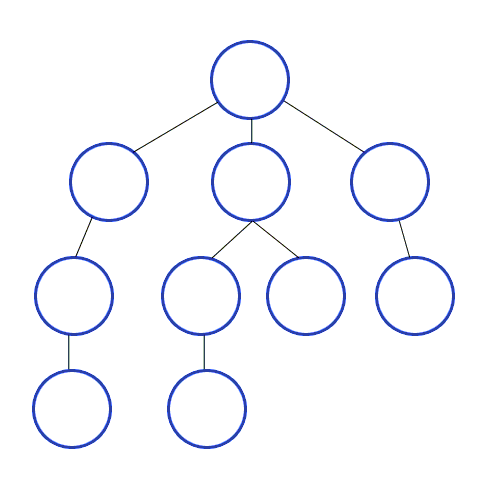

Напишем код, который записывает в список название статей в `BFS` порядке обхода. Как будет устроен алгоритм:
- у нас есть вспомогательный список `worklist`, изначально мы добавим в него наш корневой узел
- если в `worklist` больше нет узлов, то работа завершается, мы обошли все узлы
- иначе мы достаем из `worklist` нулевой элемент (и удаляем его из списка, можно использовать метод `pop` у листа)
- обрабатываем узел, который мы достали (в нашем случае записываем его `title` в список `result`)
- берем соседей этого узла. записываем их в конец `worklist`
- переходим на следующую итерацию цикла

**Не забудьте также обработать циклы, аналогично с поиском в глубину!**

*Пример*:

Статья "Собака", соседи - "Волк" и "Человек"

- начинаем со статьи про собак, добавляем ее в `worklist`
- достаем из `worklist` нулевой элемент, `worklist` стал пуст, текущий узел - "Собака"
- добавляем в список `result` название статьи. в `worklist` кладем соседей - "Волк" и "Человек"
- достаем из `worklist` нулевой элемент - "Волка". пишем название в `result`, в `worklist` ничего не добавляем - соседей нет
- достаем из `worklist` статью "Человек". записываем в `result`, в `worklist` ничего не добавляем
- `worklist` у нас пустой, алгоритм завершается

Итог: в result лежит список ['Собака', 'Волк', 'Человек']

Напишите поиск в глубину:
- оформите его в виде класса, класс нужно назвать `BFS`
- внутри должна быть объявлена функция `traverse(node)`, принимает в себя узел
- переменная `worklist` должна быть локальной переменной в функции `traverse`. 
- нужно также обработать циклы в графе

In [18]:
class BFS:
    # TODO: напишите здесь ваш код
    pass

### Итог

В этой лабе мы:
- научились моделировать графы в питоне (в частности, графы статей в википедии)
- научились обходить граф двумя способами: DFS и BFS

В следующей лабе мы применим эти знания уже непосредственно к реальным статьям в Википедии. Пока что можете подумать, какой алгоритм - DFS или BFS нам подойдет больше при поиске Мордора.

### Сдача лабы

Скопируйте ваши итоговые классы `Node`, `BFS` и `DFS` в файл `graph.py`.
Тесты для них находятся в файле `graph_test.py` и запускаются автоматически.